In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [6]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [7]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

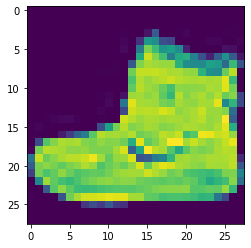

In [8]:
plt.imshow(x_train[0])

In [9]:
print(y_train[0])

9


In [10]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [11]:
x_train = x_train.astype(float) / 255.0
x_test = x_test.astype(float) / 255.0

In [12]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer ,Conv2D, MaxPooling2D, Flatten,Dense

In [15]:
model = Sequential()
model.add(InputLayer(input_shape=(28,28,1)))
model.add(Conv2D(filters=10,kernel_size=3,strides=(1,1),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=10,kernel_size=3,strides=(1,1),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=10,kernel_size=3,strides=(1,1),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 10)        910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 10)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 10)          910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 10)         0

In [17]:
import tensorflow
model.compile(optimizer='adam',loss=tensorflow.keras.losses.categorical_crossentropy,metrics=['acc'])


In [18]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [19]:
history=model.fit(x_train,y_train,epochs=30,batch_size=512,validation_data=(x_test,y_test))

Epoch 1/30
118/118 [==============================] - 24s 195ms/step - loss: 1.4358 - acc: 0.5286 - val_loss: 0.8972 - val_acc: 0.6737
Epoch 2/30
118/118 [==============================] - 20s 166ms/step - loss: 0.8133 - acc: 0.7031 - val_loss: 0.7722 - val_acc: 0.7209
Epoch 3/30
118/118 [==============================] - 20s 168ms/step - loss: 0.7163 - acc: 0.7369 - val_loss: 0.7148 - val_acc: 0.7372
Epoch 4/30
118/118 [==============================] - 20s 167ms/step - loss: 0.6660 - acc: 0.7524 - val_loss: 0.6760 - val_acc: 0.7508
Epoch 5/30
118/118 [==============================] - 20s 166ms/step - loss: 0.6322 - acc: 0.7657 - val_loss: 0.6516 - val_acc: 0.7633
Epoch 6/30
118/118 [==============================] - 20s 169ms/step - loss: 0.6119 - acc: 0.7743 - val_loss: 0.6287 - val_acc: 0.7707
Epoch 7/30
118/118 [==============================] - 20s 168ms/step - loss: 0.5930 - acc: 0.7822 - val_loss: 0.6153 - val_acc: 0.7741
Epoch 8/30
118/118 [==============================] - 2